# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0] # First element of training features shape 

# TODO: Number of testing examples.
n_test = X_test.shape[0] # First element of test features shape

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]] # Second and third elements of the feature shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() - y_train.min() + 1 # labels are not one-hot encoded. Mapped to decimal values

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

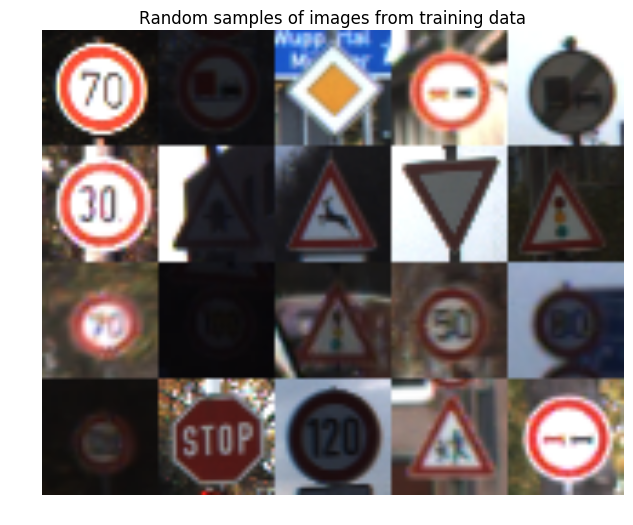

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Plot some random training images
l1 = np.random.randint(0, (n_train-1), 5)
l2 = np.random.randint(0, (n_train-1), 5)
l3 = np.random.randint(0, (n_train-1), 5)
l4 = np.random.randint(0, (n_train-1), 5)
img1 = np.concatenate((X_train[l1[0]], X_train[l1[1]], X_train[l1[2]], X_train[l1[3]], X_train[l1[4]]), axis=1)
img2 = np.concatenate((X_train[l2[0]], X_train[l2[1]], X_train[l2[2]], X_train[l2[3]], X_train[l2[4]]), axis=1)
img3 = np.concatenate((X_train[l3[0]], X_train[l3[1]], X_train[l3[2]], X_train[l3[3]], X_train[l3[4]]), axis=1)
img4 = np.concatenate((X_train[l4[0]], X_train[l4[1]], X_train[l4[2]], X_train[l4[3]], X_train[l4[4]]), axis=1)

img = np.concatenate((img1, img2, img3, img4), axis=0)
plt.axis('off')
plt.title('Random samples of images from training data')
plt.imshow(img)

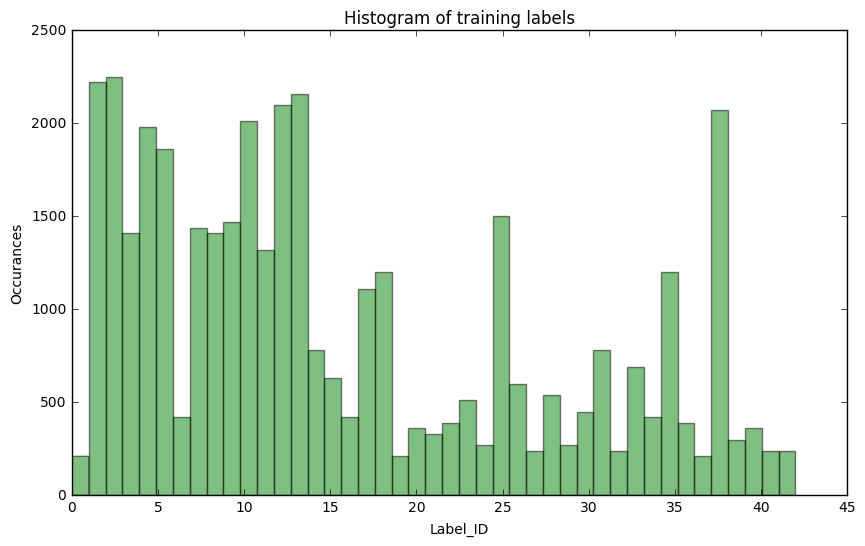

In [4]:
# Plot histogram of training labels
plt.hist(y_train, n_classes, color='green', alpha=0.5)
plt.xlabel('Label_ID')
plt.ylabel('Occurances')
plt.title('Histogram of training labels')
plt.show()

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split the data into me-training and my-validation
if (os.path.isfile('my_train.p') & os.path.isfile('my_val.p')):
    print('Training-Validation split files already exist, not regenerating')
    # Load the existing files
    with open("my_train.p", mode='rb') as f:
        my_train = pickle.load(f)
    with open("my_val.p", mode='rb') as f:
        my_val = pickle.load(f)
    X_my_train, y_my_train = my_train['features'], my_train['labels']
    X_my_val, y_my_val = my_val['features'], my_val['labels']
else:
    my_train = {}
    my_val = {}
    X_my_train, X_my_val, y_my_train, y_my_val = train_test_split(X_train, y_train)
    my_train['features'] = X_my_train
    my_train['labels'] = y_my_train
    my_val['features'] = X_my_val
    my_val['labels'] = y_my_val
    pickle.dump(my_train, open( "my_train.p", "wb" ))
    pickle.dump(my_val, open( "my_val.p", "wb" ))

# my_train and my_val datasets are defined now    
n_my_train = X_my_train.shape[0]
n_my_val = X_my_val.shape[0]
percent_val = round(100 * n_my_val / (n_my_val + n_my_train), 2) 
percent_train = round(100 * n_my_train / (n_my_val + n_my_train), 2) 
print("Number of my my training examples =", n_my_train, "--", percent_train, "% of original training dataset")
print("Number of my validation examples =", n_my_val, "--", percent_val, "% of original training dataset")

# Generate additional data

# Add random brightness, using Tensorflow built in op
rb_tensor = tf.map_fn(lambda img: tf.image.random_brightness(img, 0.2), X_my_train)
with tf.Session() as sess:
    rb_tensor_eval = rb_tensor.eval()
X_my_train_rb = np.asarray(rb_tensor_eval)

# Add random contrast, using Tensorflow built in op
rc_tensor = tf.map_fn(lambda img: tf.image.random_contrast(img, 0.95, 1.05), X_my_train)
with tf.Session() as sess:
    rc_tensor_eval = rc_tensor.eval()
X_my_train_rc = np.asarray(rc_tensor_eval)

X_my_train = np.concatenate((X_my_train, X_my_train_rb, X_my_train_rc), axis=0)

y_my_train = np.concatenate((y_my_train, y_my_train, y_my_train), axis=0)
n_my_train = 3*n_my_train

Training-Validation split files already exist, not regenerating
Number of my my training examples = 29406 -- 75.0 % of original training dataset
Number of my validation examples = 9803 -- 25.0 % of original training dataset


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Convert labels from integers into one-hot
y_my_train = np.eye(n_classes)[y_my_train]
y_my_val = np.eye(n_classes)[y_my_val]
y_test = np.eye(n_classes)[y_test]

def eqn(img_rgb):
    '''
    Function to equalize and normalize an RGB image
    '''
    img_yuv = cv2.split(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV))
    img_yuv[0] = cv2.equalizeHist(img_yuv[0])
    img_eq = cv2.cvtColor(cv2.merge(img_yuv), cv2.COLOR_YUV2RGB)
    img_eqn = -0.5 + img_eq/255 # Normalize RGB image to range -0.5 to +0.5
    return img_eqn

# Preprocess training, validation and test datasets
X_my_train_processed = []
for img in X_my_train:
    X_my_train_processed.append(eqn(img))
X_my_train = np.asarray(X_my_train_processed)

X_my_val_processed = []
for img in X_my_val:
    X_my_val_processed.append(eqn(img))
X_my_val = np.asarray(X_my_val_processed)

X_test_processed = []
for img in X_test:
    X_test_processed.append(eqn(img))
X_test = np.asarray(X_test_processed)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 250
BATCH_SIZE = 100

def conv2d(x, W, b, strides=1, max_pool=1):
    """
    Conv2D wrapper, with bias, relu activation, and max pooling
    """
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    if (max_pool == 1):
        x = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2,1], padding='SAME')
    return x

def TS_ConvNet(x, keep_prob):
    """
    Traffic Sign detection Convolutional Neural Network
    Size of tensor x is assumed to be [-1, 32, 32, 3]
    """
    # Define depth of each hidden layer
    layer_depth = {
      'layer_1': 6,
      'layer_2': 16,
      'fully_connected': 120
    }
    # Initialized weights to small random numbers, 0 mean, 0.001 stddev
    weights = {
      'layer_1': tf.Variable(tf.truncated_normal(
          [5, 5, 3, layer_depth['layer_1']], stddev=0.001)),
      'layer_2': tf.Variable(tf.truncated_normal(
          [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], stddev=0.001)),
      'fully_connected': tf.Variable(tf.truncated_normal(
          [12*12*16, layer_depth['fully_connected']], stddev=0.001)),
      'out': tf.Variable(tf.truncated_normal(
          [layer_depth['fully_connected'], n_classes], stddev=0.001))
    }
    # Initialize biases to zero
    biases = {
      'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
      'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
      'fully_connected': tf.Variable(tf.zeros(layer_depth['fully_connected'])),
      'out': tf.Variable(tf.zeros(n_classes))
    }
    
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'], max_pool=0)
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'], max_pool=1)
    flat = tf.contrib.layers.flatten(conv2)
    fc1 = tf.add(tf.matmul(flat, weights['fully_connected']), biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1) # tanh gave better result than relu, for fc1
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Return the result of the last fully connected layer.
    # return tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    # Calculate output logits
    logits_out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    # Calculate L2 norm for the weights (needed for regularization, beta = 0.0001)
    l2_weights = 0.00000001*(tf.nn.l2_loss(weights['layer_1']) + tf.nn.l2_loss(weights['layer_2']) +
                      tf.nn.l2_loss(weights['fully_connected'] + tf.nn.l2_loss(weights['out'])))
    
    # Return output logits and L2 norm
    return logits_out, l2_weights

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

# German Traffic sign dataset consists of 32x232x3 RGB images
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# Classify over n_classes
y = tf.placeholder(tf.float32, (None, n_classes))
# Keep probability for Dropout layers
keep_prob = tf.placeholder(tf.float32)

# Pass input to the TS_ConvNet
logits, l2_loss = TS_ConvNet(x, keep_prob) # Output of the final Fully Connected layer

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y)) + l2_loss
opt = tf.train.AdamOptimizer(learning_rate=0.0001)
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = n_my_train // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    X_my_train, y_my_train = shuffle(X_my_train, y_my_train) # Initial shuffle of training dataset 
    for i in range(EPOCHS):
        for step in range(steps_per_epoch):
            start_idx = step*BATCH_SIZE
            end_idx = step*BATCH_SIZE + BATCH_SIZE    
            batch_x = X_my_train[start_idx:end_idx,:,:,:]
            batch_y = y_my_train[start_idx:end_idx,:]
            _, loss, acc = sess.run([train_op, loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        X_my_train, y_my_train = shuffle(X_my_train, y_my_train) # End of epoch shuffle
        
        # Logging
        if (((i+1) % 10)==0):
            print("EPOCH {}: ".format(i+1), "loss = {:.3f}, ".format(loss), "accuracy = {:.3f}".format(acc))
     
    val_loss, val_acc = sess.run([loss_op, accuracy_op], feed_dict={x: X_my_val, y: y_my_val, keep_prob: 1.0})
    print()
    print("Validation loss = {:.3f}".format(val_loss))
    print("Validation accuracy = {:.3f}".format(val_acc)) 
    test_loss, test_acc, test_corr = sess.run([loss_op, accuracy_op, correct_prediction], feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    print()
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc)) 

EPOCH 10:  loss = 1.087,  accuracy = 0.750
EPOCH 20:  loss = 0.772,  accuracy = 0.850
EPOCH 30:  loss = 0.611,  accuracy = 0.960
EPOCH 40:  loss = 0.614,  accuracy = 0.960
EPOCH 50:  loss = 0.468,  accuracy = 0.990
EPOCH 60:  loss = 0.404,  accuracy = 0.990
EPOCH 70:  loss = 0.471,  accuracy = 0.960
EPOCH 80:  loss = 0.327,  accuracy = 0.990
EPOCH 90:  loss = 0.374,  accuracy = 0.990
EPOCH 100:  loss = 0.320,  accuracy = 1.000
EPOCH 110:  loss = 0.324,  accuracy = 1.000
EPOCH 120:  loss = 0.341,  accuracy = 0.980
EPOCH 130:  loss = 0.299,  accuracy = 1.000
EPOCH 140:  loss = 0.317,  accuracy = 0.980
EPOCH 150:  loss = 0.319,  accuracy = 0.990
EPOCH 160:  loss = 0.330,  accuracy = 0.990
EPOCH 170:  loss = 0.280,  accuracy = 1.000
EPOCH 180:  loss = 0.307,  accuracy = 0.990
EPOCH 190:  loss = 0.258,  accuracy = 1.000
EPOCH 200:  loss = 0.298,  accuracy = 1.000
EPOCH 210:  loss = 0.269,  accuracy = 1.000
EPOCH 220:  loss = 0.334,  accuracy = 0.980
EPOCH 230:  loss = 0.329,  accuracy = 0.9

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
y_test_wrong = y_test[~test_corr]

y_wrong = []
for one_hot in y_test_wrong:
    index_tuple = np.nonzero(one_hot)
    index = index_tuple[0][0]
    y_wrong.append(index)
    
print(len(y_wrong))
plt.hist(y_wrong, n_classes, color='green', alpha=0.5)
plt.xlabel('Label_ID')
plt.ylabel('Occurances')
plt.title('Histogram of wrong labels')
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.